<a href="https://colab.research.google.com/github/Madeep9347/pythonProject7/blob/master/Bitcoin_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-03-03,23476.632812,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913
2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

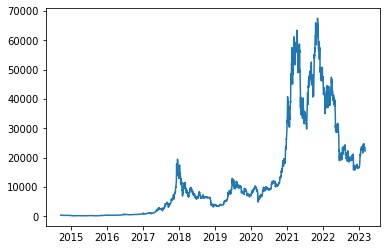

In [ ]:
 plt.plot(df.index, df['Adj Close'])
 plt.show()

In [ ]:
to_row=int(len(df)*0.9)
training_data=list(df[0:to_row]['Adj Close'])
testing_data=list(df[to_row:]['Adj Close'])
#testing_data

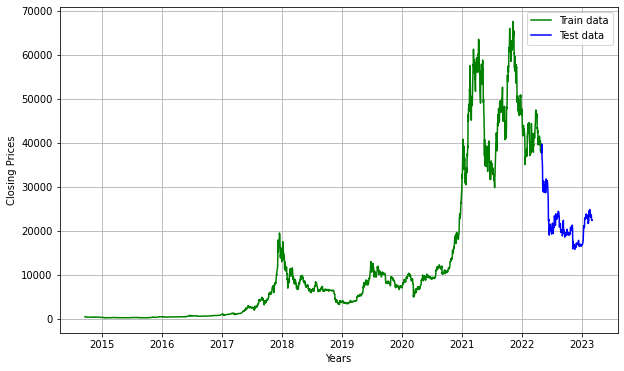

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green',label='Train data')
plt.plot(df[to_row:]['Adj Close'],'blue',label='Test data')
plt.legend()

In [ ]:
model_predictions=[]
n_test_obser=len(testing_data)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [ ]:
for i in range(n_test_obser):
  model=ARIMA(training_data,order=(4,1,0))
  model_fit=model.fit()
  output=model_fit.forecast()
  yhat=output[0]
  model_predictions.append(yhat)
  actual_test_value=testing_data[i]
  training_data.append(actual_test_value)

In [ ]:
output[0]

22395.023441884605

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3093
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -25016.710
Date:                Tue, 07 Mar 2023   AIC                          50043.421
Time:                        10:20:27   BIC                          50073.604
Sample:                             0   HQIC                         50054.261
                               - 3093                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0253      0.009     -2.710      0.007      -0.044      -0.007
ar.L2          0.0045      0.009      0.501      0.616      -0.013       0.022
ar.L3          0.0208      0.010      2.169      0.0

In [ ]:
len(testing_data)
#len(training_data)

310

In [ ]:
len(model_predictions)

310

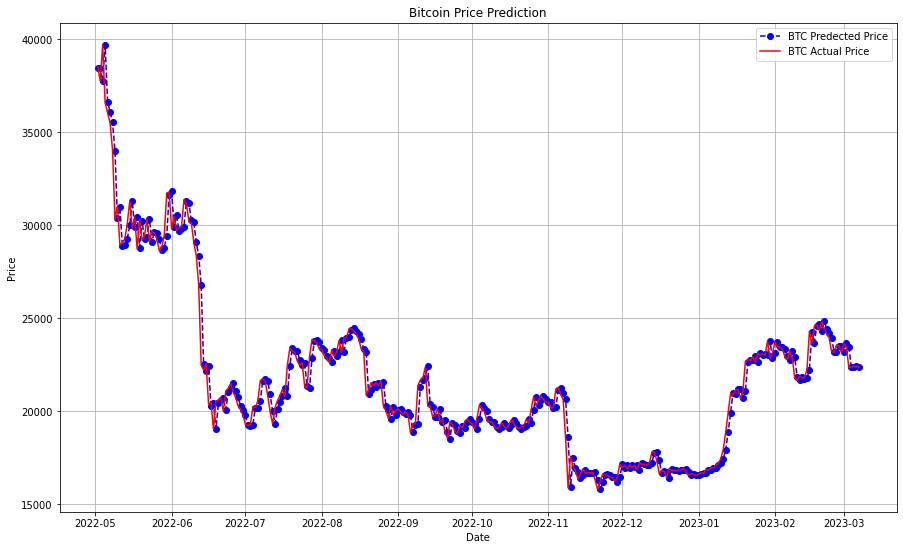

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)
date_range=df[to_row:].index
plt.plot(date_range, model_predictions,color='blue',marker='o',linestyle='dashed',label='BTC Predected Price')
plt.plot(date_range,testing_data,color='red',label='BTC Actual Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
mape=np.mean(np.abs(np.array(model_predictions) -np.array(testing_data))/np.abs(testing_data))
print('MAPE:'+str(mape))

MAPE:0.021310362001886053
